In [1]:
#Import

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from tensorflow import lite
from tensorflow import keras

In [2]:
# Load Data
df = pd.read_csv("cardio_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [3]:
#Drop the column which is not needed

df = df.dropna().drop('id',axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0


In [4]:
#converting age in no. of years
#df['age'] = df['age']//365
#df.head()

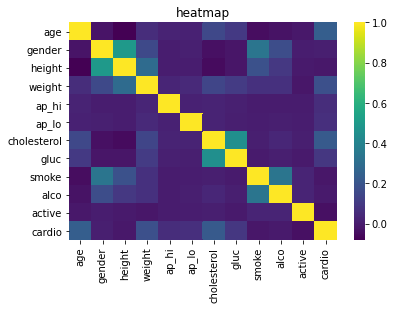

In [5]:
#Correlation Matrix

sns.heatmap(df.corr(), cmap='viridis')
plt.title('heatmap')
plt.savefig('correlation.png')

In [6]:
#check missing values

df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
from numpy import percentile
data= df['ap_hi']
# calculate interquartile range
q1, q3 = percentile(data, 0.28), percentile(data, 92)
iqr = q3 - q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off
print(upper)
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# non-outliers
non_outliers = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(non_outliers))

Percentiles: 25th=70.000, 75th=150.000, IQR=80.000
270.0
Identified outliers: 47
Non-outlier observations: 69953


In [8]:
df=df[(df['ap_hi']<upper) & (df['ap_hi']>lower)]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76,120,80,1,1,1,0,1,0
69996,22601,1,158,126,140,90,2,2,0,0,1,1
69997,19066,2,183,105,180,90,3,1,0,1,0,1
69998,22431,1,163,72,135,80,1,2,0,0,0,1


In [9]:
from numpy import percentile
data= df['ap_lo']
# calculate interquartile range
q1, q3 = percentile(data, 0.07), percentile(data, 98.6)
iqr = q3 - q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# non-outliers
non_outliers = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(non_outliers))

Percentiles: 25th=30.000, 75th=150.000, IQR=120.000
Identified outliers: 953
Non-outlier observations: 69000


In [10]:
df=df[(df['ap_lo']<upper) & (df['ap_lo']>lower)]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76,120,80,1,1,1,0,1,0
69996,22601,1,158,126,140,90,2,2,0,0,1,1
69997,19066,2,183,105,180,90,3,1,0,1,0,1
69998,22431,1,163,72,135,80,1,2,0,0,0,1


In [11]:
catogrial_val = ['gender', 'cholesterol','gluc', 'smoke', 'alco']

In [12]:
continous_val = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

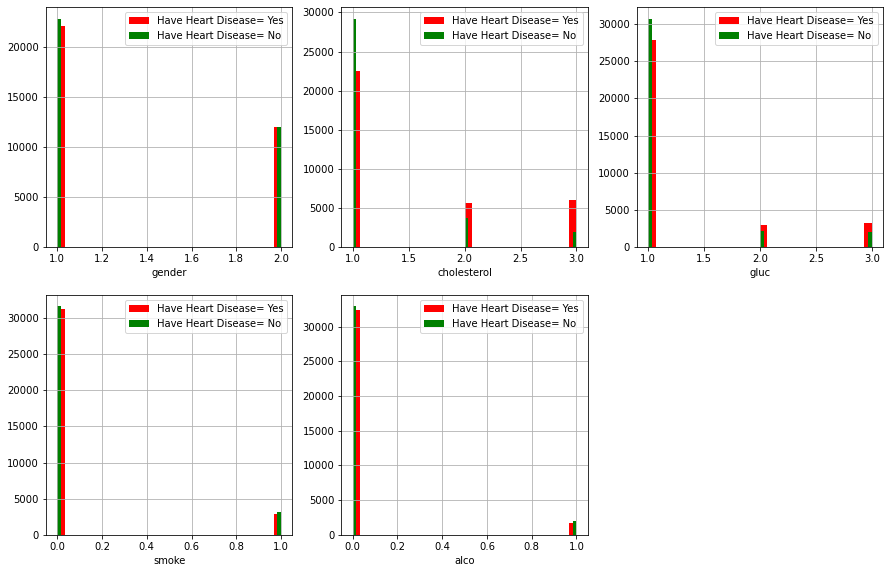

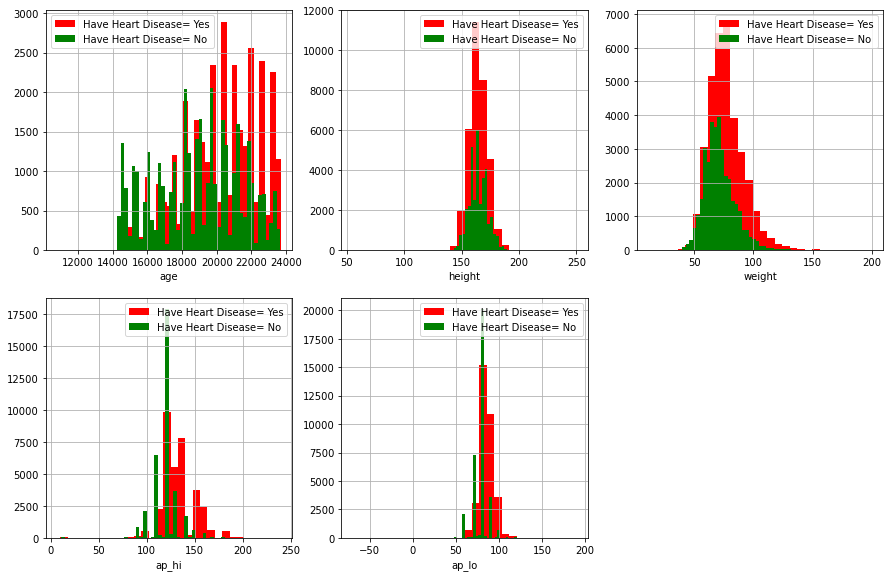

In [13]:
plt.figure(figsize=(15,15))
for i, column in enumerate(catogrial_val, 1):
    plt.subplot(3, 3, i)
    df[df["cardio"]==1][column].hist(bins=30, color='red',label='Have Heart Disease= Yes')
    df[df["cardio"]==0][column].hist(bins=60, color='green',label='Have Heart Disease= No')
    plt.legend()
    plt.xlabel(column)
    
plt.savefig('graph1.png')
    
plt.figure(figsize=(15,15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["cardio"]==1][column].hist(bins=30, color='red',label='Have Heart Disease= Yes')
    df[df["cardio"]==0][column].hist(bins=60, color='green',label='Have Heart Disease= No')
    plt.legend()
    plt.xlabel(column)
    
plt.savefig('graph2.png')

In [14]:
# Get dummies for categorical values

df = pd.get_dummies(data=df,columns=['gender','cholesterol','gluc'])
df.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,18393,168,62,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,20228,156,85,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,18857,165,64,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,17623,169,82,150,100,0,0,1,1,0,1,1,0,0,1,0,0
4,17474,156,56,100,60,0,0,0,0,1,0,1,0,0,1,0,0


In [15]:
df=df.rename({"gender_1":"male","gender_2":"female","cholesterol_1":"normal_cholesterol","cholesterol_2":"above_high_cholesterol","cholesterol_3":"high_cholesterol","gluc_1":"normal_glucose","gluc_2":"high_glucose","gluc_3":"above_high_glucose"},axis='columns')

In [16]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(df.drop('cardio',axis=1),df['cardio'],random_state=0)

In [17]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion = 'entropy')
rfc.fit(x_train,y_train)
rf_score = rfc.score(x_test,y_test)
print("The accuracy score achieved using Random Forest Classifier is: "+str(rf_score))

The accuracy score achieved using Random Forest Classifier is: 0.7091594202898551


In [18]:
print(dict(zip(df.columns,rfc.feature_importances_)))

{'age': 0.32626893333795537, 'height': 0.17184278506763248, 'weight': 0.18820592635655378, 'ap_hi': 0.144555191848585, 'ap_lo': 0.07827298474652676, 'smoke': 0.00881444137644026, 'alco': 0.007784299971748858, 'active': 0.013712826756096197, 'cardio': 0.006987862546781529, 'male': 0.007088539940188252, 'female': 0.013431689514343644, 'normal_cholesterol': 0.004852640380370892, 'above_high_cholesterol': 0.012311899360586784, 'high_cholesterol': 0.006500220656665272, 'normal_glucose': 0.004831723345874998, 'high_glucose': 0.0045380347936499164}


In [19]:
# K Nearest neighbor Classifier

kn_scores = []
k_range = range(1, 51)

for k in k_range:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    kn_scores.append(knc.score(x_test,y_test))
print(dict(zip(k_range,kn_scores)))

{1: 0.6260289855072464, 2: 0.6326376811594203, 3: 0.6598840579710145, 4: 0.664, 5: 0.6793623188405797, 6: 0.6846376811594203, 7: 0.692, 8: 0.691304347826087, 9: 0.6958840579710145, 10: 0.6942028985507246, 11: 0.6980869565217391, 12: 0.7006376811594203, 13: 0.6996521739130435, 14: 0.7009855072463768, 15: 0.7039420289855073, 16: 0.704231884057971, 17: 0.7058550724637681, 18: 0.7055072463768116, 19: 0.705391304347826, 20: 0.7048115942028985, 21: 0.7056811594202899, 22: 0.7053333333333334, 23: 0.7049275362318841, 24: 0.7066086956521739, 25: 0.7073623188405798, 26: 0.7066666666666667, 27: 0.707536231884058, 28: 0.7052173913043478, 29: 0.7066666666666667, 30: 0.7048115942028985, 31: 0.708, 32: 0.7067826086956521, 33: 0.7084057971014492, 34: 0.7054492753623188, 35: 0.707536231884058, 36: 0.7055072463768116, 37: 0.7079420289855073, 38: 0.7063188405797102, 39: 0.7075942028985507, 40: 0.7067246376811595, 41: 0.7083478260869566, 42: 0.7061449275362319, 43: 0.7066086956521739, 44: 0.70562318840579

The accuracy score achieved using KNN Classifier is: 0.7084057971014492


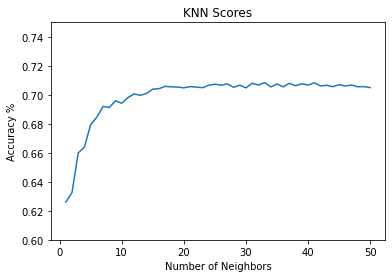

In [20]:
# Accuracy of different KNN Classifiers

plt.plot(k_range, kn_scores)
plt.ylim(0.6,0.75)
plt.title('KNN Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy %')
print("The accuracy score achieved using KNN Classifier is: "+str(max(kn_scores)))

In [21]:
# Logistic Regression

lr = LogisticRegression(penalty= 'l1',solver= 'liblinear')
lr.fit(x_train,y_train)
lr_score = accuracy_score(y_test,lr.predict(x_test))
print("The accuracy score achieved using Logistic Regression is: "+str(lr_score))

The accuracy score achieved using Logistic Regression is: 0.7267246376811595


In [22]:
#Naive Bayes 

gnb = GaussianNB()
#gnb.partial_fit(x_train, y_train,np.unique(y_train))
gnb.fit(x_train,y_train)
gnb_score = gnb.score(x_test, y_test)
print ("The accuracy score achieved using Naive Bayes is: "+str(gnb_score))

The accuracy score achieved using Naive Bayes is: 0.6627246376811594


In [23]:
# Voting Classifier

knn = KNeighborsClassifier(n_neighbors=26)
lr = LogisticRegression(penalty='l1',solver= 'liblinear')
rfc = RandomForestClassifier(n_estimators=500, criterion = 'entropy')
gnb = GaussianNB()
vc = VotingClassifier(estimators=[('knn',knn),('lr',lr),('rfc',rfc),('gnb',gnb)], voting='soft')
vc.fit(x_train,y_train)
vc_score = vc.score(x_test, y_test)
print ("The accuracy score achieved using Voting Classifier is: "+str(vc_score))

The accuracy score achieved using Voting Classifier is: 0.7224347826086956


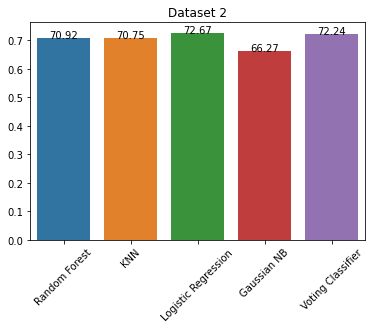

In [24]:
label = ['Random Forest','KNN','Logistic Regression','Gaussian NB','Voting Classifier']
scores = [rf_score,kn_scores[26],lr_score,gnb_score,vc_score]
sns.barplot(x=label,y=scores)
plt.xticks(rotation=45)
for i in range(len(label)):
    plt.text(i,scores[i],round(scores[i]*100,2),horizontalalignment='center')
plt.title('Dataset 2')
plt.savefig('results.png')

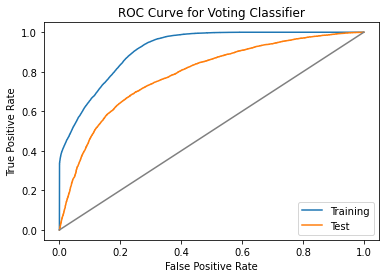

In [25]:
# ROC Curve for Voting Classifier

fpr,tpr,thres = roc_curve(y_train,vc.predict_proba(x_train)[::,1])
fpr2,tpr2,thres2 = roc_curve(y_test,vc.predict_proba(x_test)[::,1])
plt.plot(fpr,tpr,label='Training')
plt.plot(fpr2,tpr2,label='Test')
plt.plot([0,1],[0,1],c='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.savefig('Voting Classifier ROC.png')